In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Load the dataset from the CSV file
# The encoding='unicode_escape' helps handle any special characters in the file.
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

# Display the number of rows and columns
print("Shape of the data (rows, columns):", df.shape)
print("\n")

# Display the first 5 rows of the data
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

# Get a concise summary of the dataframe, including data types and null values
print("Dataframe Info:")
df.info()

Shape of the data (rows, columns): (11251, 15)


First 5 rows of the dataset:
   Unnamed: 0  User_ID  Cust_name Product_ID Gender Age Group  Age  \
0           0  1002903  Sanskriti  P00125942      F     26-35   28   
1           1  1000732     Kartik  P00110942      F     26-35   35   
2           2  1001990      Bindu  P00118542      F     26-35   35   
3           3  1001425     Sudevi  P00237842      M      0-17   16   
4           4  1000588       Joni  P00057942      M     26-35   28   

   Marital_Status            State      Zone       Occupation  \
0               0      Maharashtra   Western       Healthcare   
1               1  AndhraÂ Pradesh  Southern             Govt   
2               1    Uttar Pradesh   Central       Automobile   
3               0        Karnataka  Southern     Construction   
4               1          Gujarat   Western  Food Processing   

  Product_Category  Orders   Amount age_group  
0             Auto       1  23952.0     19-30  
1             

In [3]:
# First, let's see the exact names of your columns
print("Current columns are:", df.columns)

# Now, we will check if the column exists before trying to drop it
if 'Unnamed: 0' in df.columns:
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    print("\n'Unnamed: 0' column was found and has been dropped.")
else:
    print("\n'Unnamed: 0' column not found. It may have been dropped in a previous step.")

Current columns are: Index(['Unnamed: 0', 'User_ID', 'Cust_name', 'Product_ID', 'Gender',
       'Age Group', 'Age', 'Marital_Status', 'State', 'Zone', 'Occupation',
       'Product_Category', 'Orders', 'Amount', 'age_group'],
      dtype='object')

'Unnamed: 0' column was found and has been dropped.


In [5]:
# Check for null values in each column
print("Null values before cleaning:")
print(pd.isnull(df).sum())

# Drop rows that contain any null values
df.dropna(inplace=True)

# Check the null values again to confirm they are removed
print("\nNull values after cleaning:")
print(pd.isnull(df).sum())

Null values before cleaning:
User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
age_group           0
dtype: int64

Null values after cleaning:
User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
age_group           0
dtype: int64


In [19]:
# Change the data type of the 'Amount' column from float to integer
df['Amount'] = df['Amount'].astype('int')
    
# Verify the data type change by checking the first 5 rows again
print("\nData head after all cleaning:")
print(df.head())


Data head after all cleaning:
   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

             State      Zone       Occupation Product_Category  Orders  \
0      Maharashtra   Western       Healthcare             Auto       1   
1  AndhraÂ Pradesh  Southern             Govt             Auto       3   
2    Uttar Pradesh   Central       Automobile             Auto       3   
3        Karnataka  Southern     Construction             Auto       2   
4          Gujarat   Western  Food Processing             Auto       2   

   Amount age_group  
0   23952     19-30  
1   23934     31-40  
2   23924    

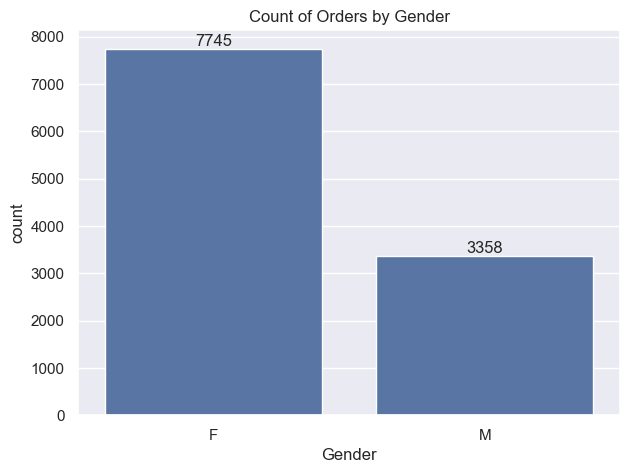

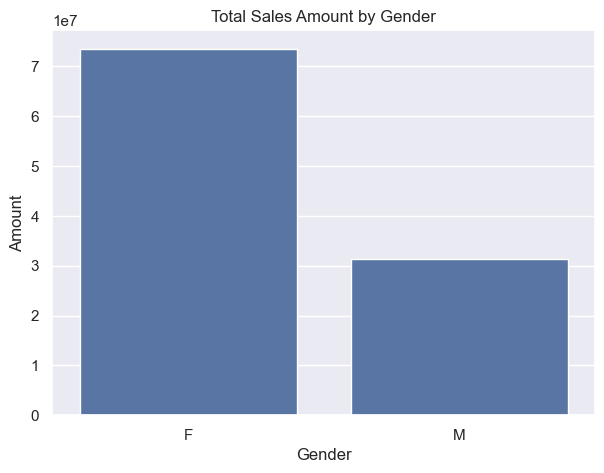

In [20]:
# Set the style for the plots for better aesthetics
sns.set(rc={'figure.figsize':(7,5)})

# Plot 1: Count of Orders by Gender
ax = sns.countplot(x='Gender', data=df)
plt.title('Count of Orders by Gender')

# Add labels to the top of the bars
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Plot 2: Total Sales Amount by Gender
sales_by_gender = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Gender', y='Amount', data=sales_by_gender)
plt.title('Total Sales Amount by Gender')
plt.show()

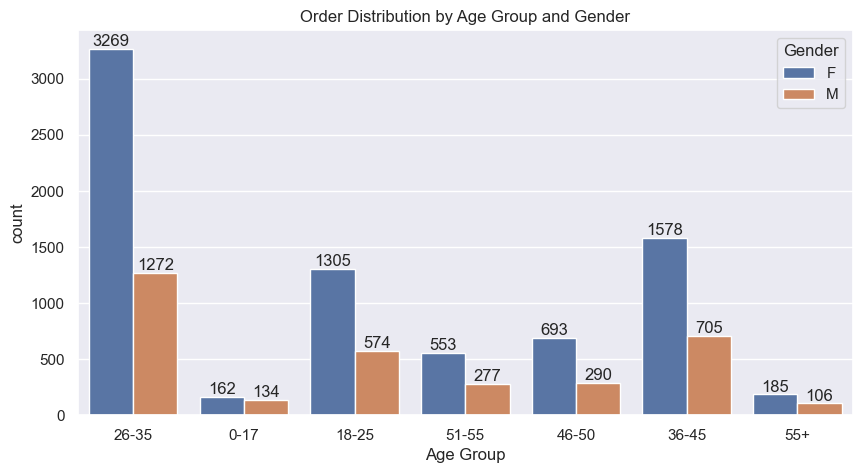

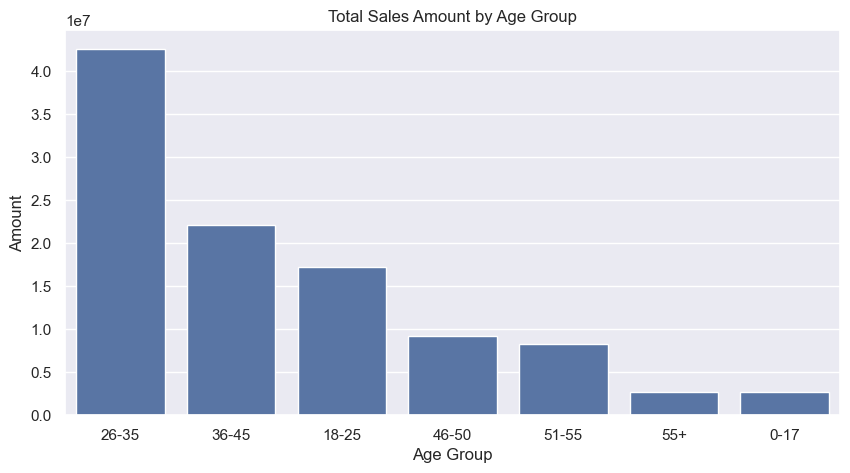

In [6]:
# Set the plot size for better readability
sns.set(rc={'figure.figsize':(10,5)})

# Plot 1: Order Distribution by Age Group, separated by Gender
ax = sns.countplot(data=df, x='Age Group', hue='Gender' )
plt.title('Order Distribution by Age Group and Gender')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Plot 2: Total Sales Amount by Age Group
sales_by_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(x='Age Group', y='Amount', data=sales_by_age)
plt.title('Total Sales Amount by Age Group')
plt.show()

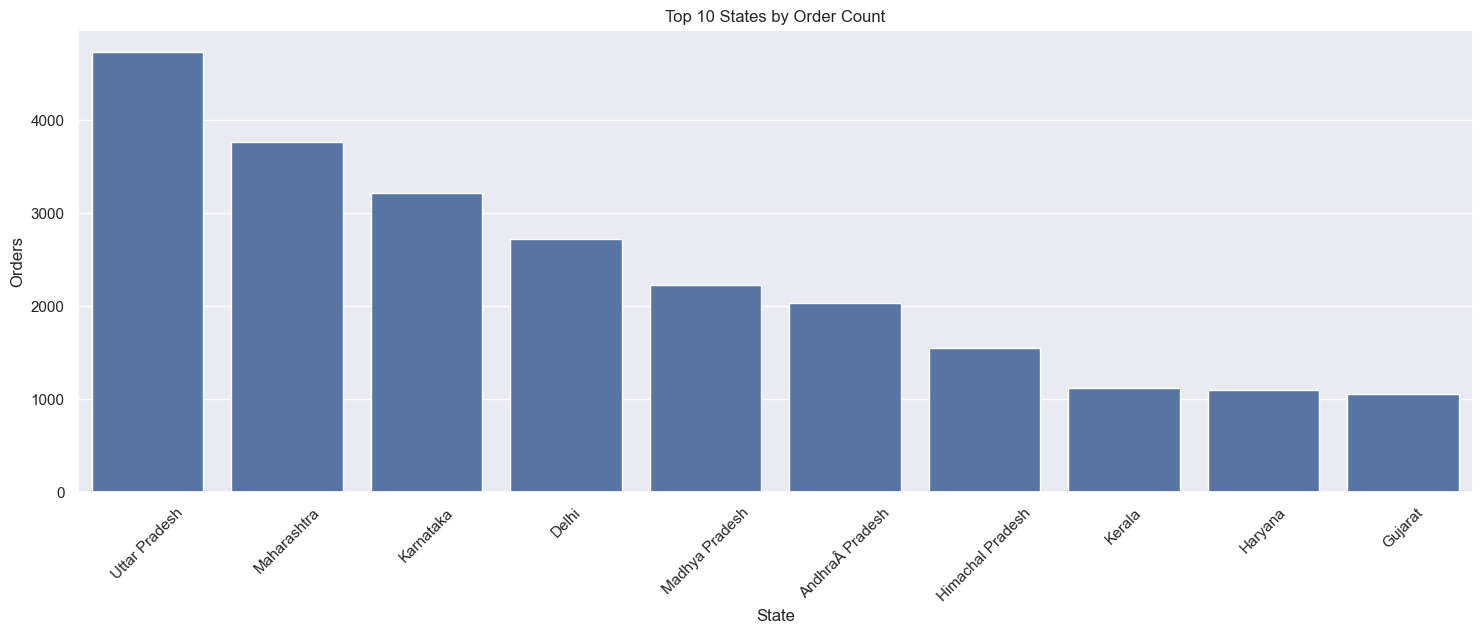

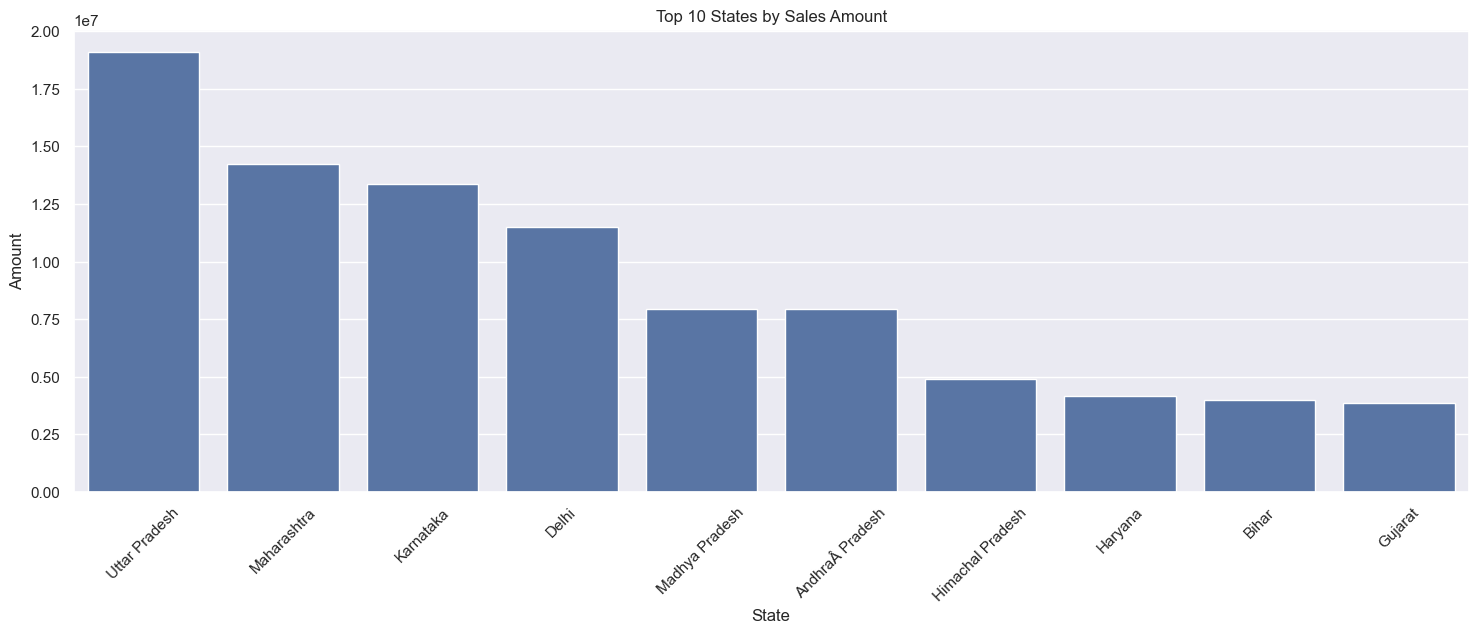

In [22]:
# Group by State and sum the orders, then select the top 10
orders_by_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

# Set figure size
sns.set(rc={'figure.figsize':(18, 6)})

# Plotting the bar chart for Top 10 States by Order Count
sns.barplot(data=orders_by_state, x='State', y='Orders')
plt.title('Top 10 States by Order Count')
plt.xticks(rotation=45)
plt.show()

# Group by State and sum the sales amount, then select the top 10
sales_by_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

# Plotting the bar chart for Top 10 States by Sales Amount
sns.barplot(data=sales_by_state, x='State', y='Amount')
plt.title('Top 10 States by Sales Amount')
plt.xticks(rotation=45)
plt.show()

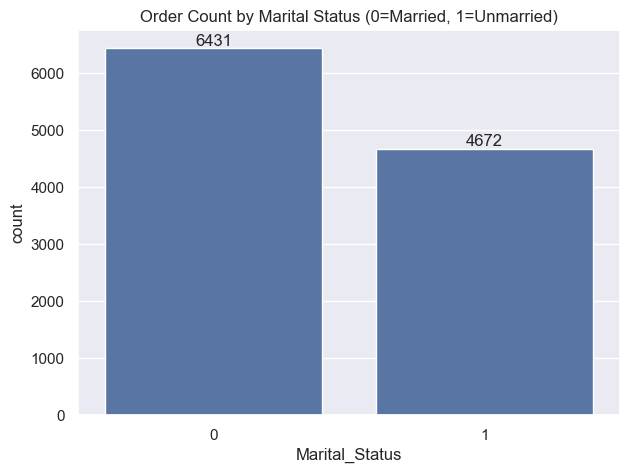

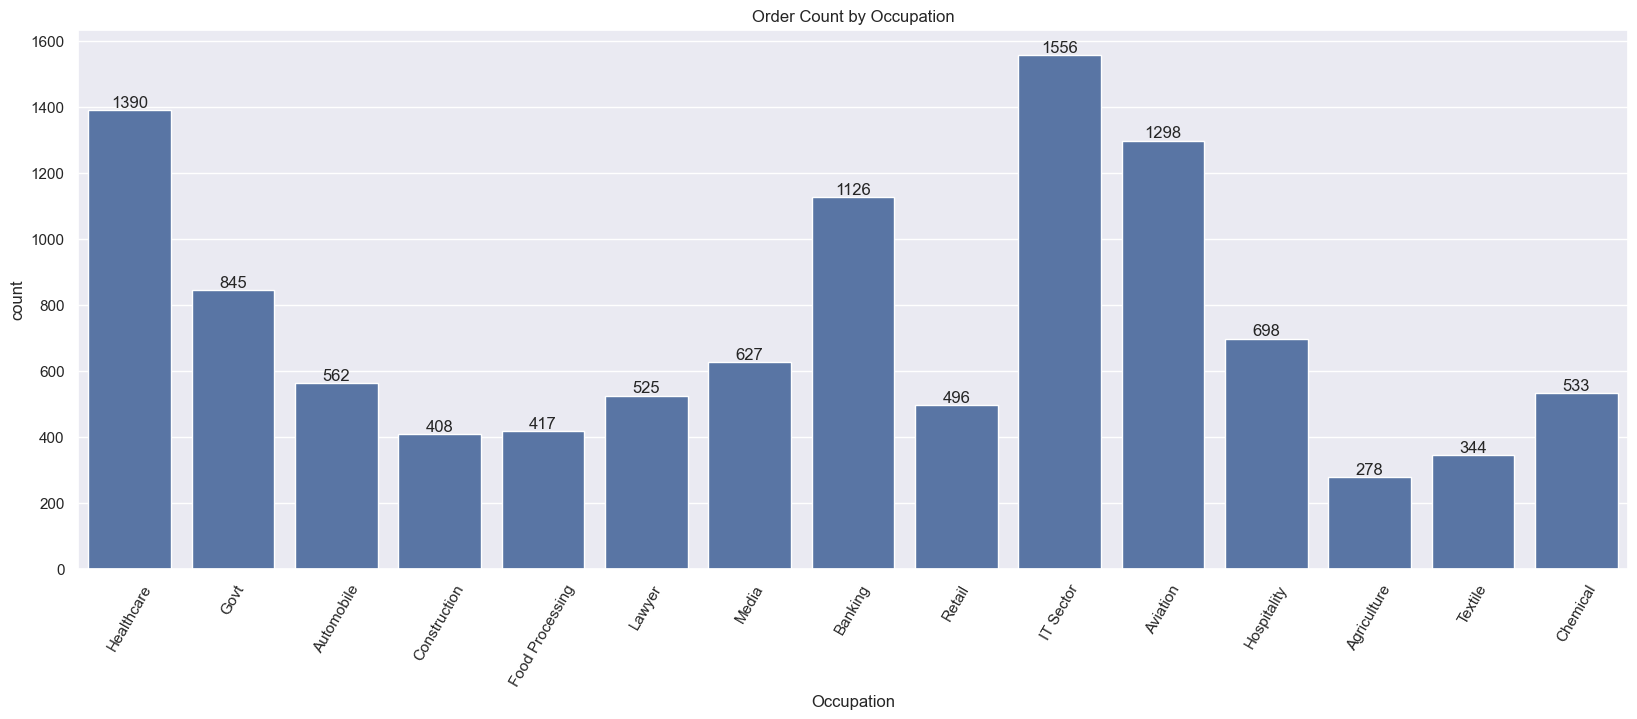

In [23]:
# Plot 1: Order Count by Marital Status
sns.set(rc={'figure.figsize':(7, 5)})
ax = sns.countplot(data=df, x='Marital_Status')
plt.title('Order Count by Marital Status (0=Married, 1=Unmarried)')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# Plot 2: Order Count by Occupation
sns.set(rc={'figure.figsize':(20, 7)})
ax = sns.countplot(data=df, x='Occupation')
plt.title('Order Count by Occupation')
plt.xticks(rotation=60)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

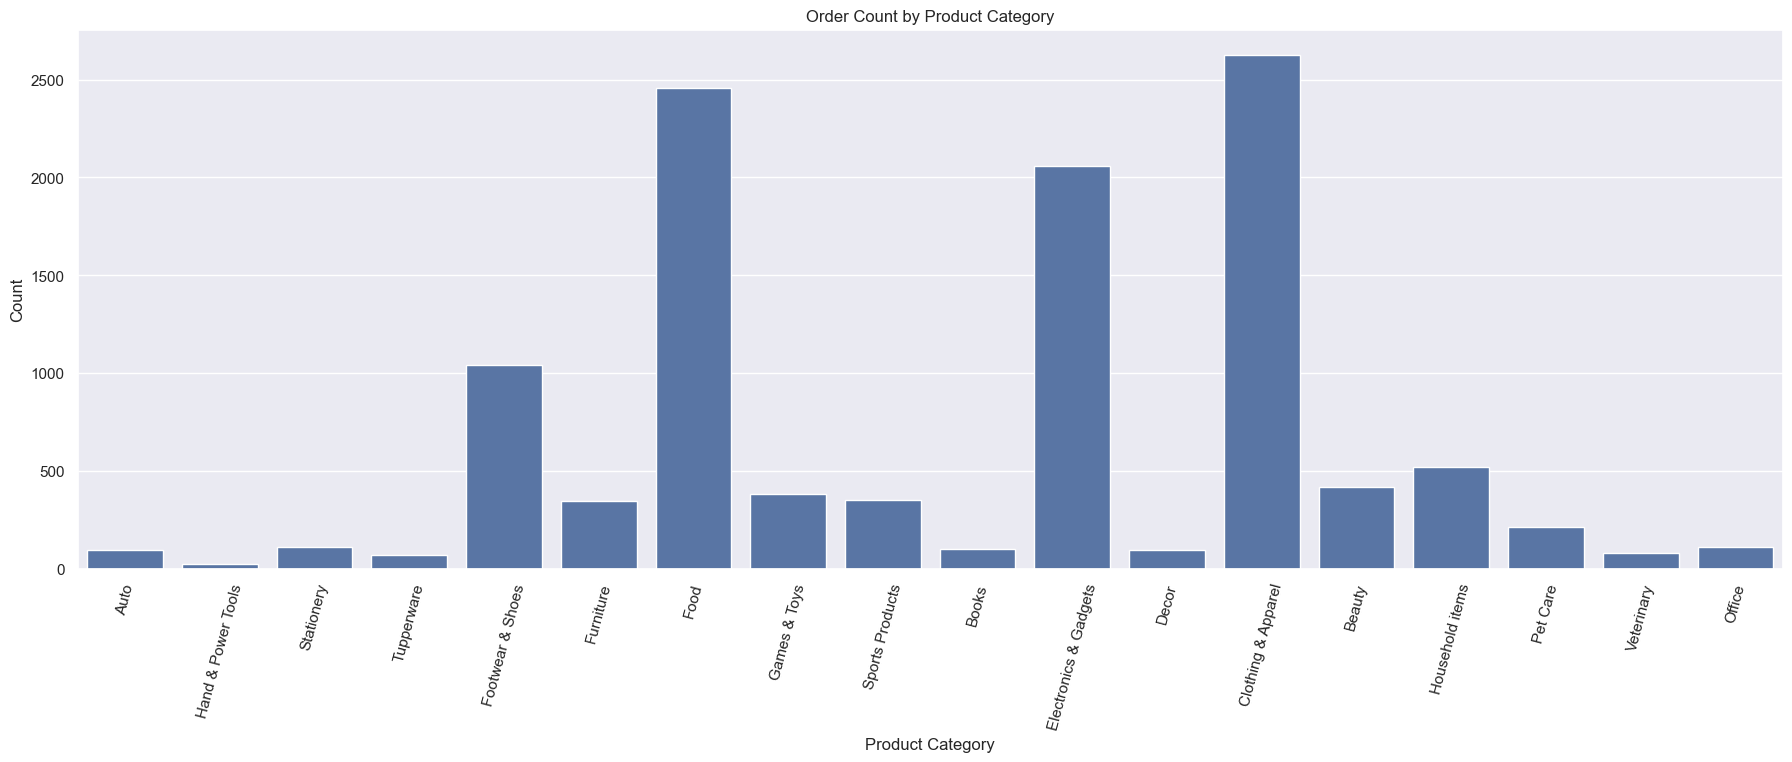

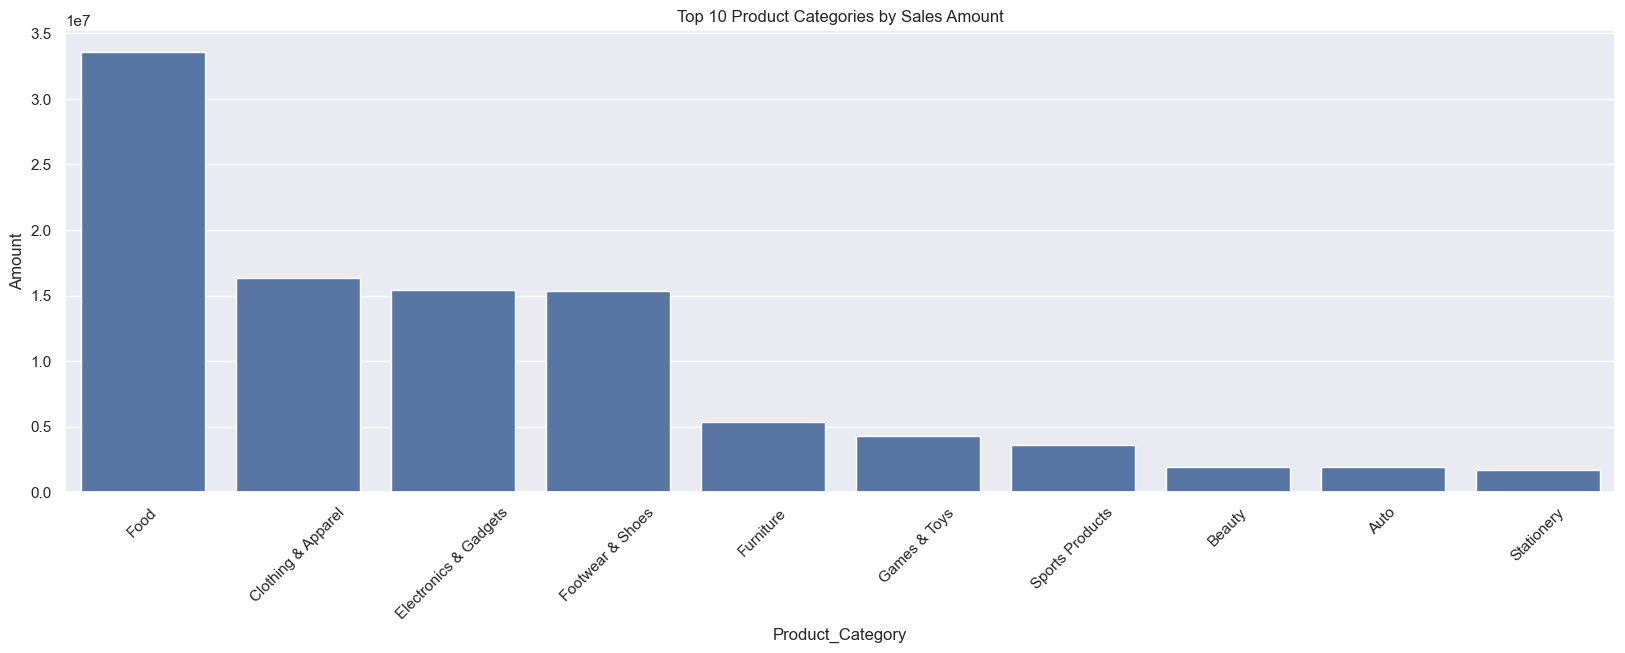

In [24]:
# Set figure size for better readability of x-axis labels
sns.set(rc={'figure.figsize':(22, 7)})

# Plot 1: Order Count by Product Category
ax = sns.countplot(data=df, x='Product_Category')
plt.title('Order Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

# Plot 2: Top 10 Selling Product Categories by Sales Amount
sales_by_product = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20, 6)})
sns.barplot(data=sales_by_product, x='Product_Category', y='Amount')
plt.title('Top 10 Product Categories by Sales Amount')
plt.xticks(rotation=45)
plt.show()